Q1. Difference between K-Means and Hierarchical Clustering
   
    Use Case
    - K-Means:
    - Partition-based algorithm.
    - Requires the number of clusters k in advance.
    - Iteratively assigns points to nearest cluster center and updates centers.
    - Use Case: Customer segmentation in e-commerce.
    - Hierarchical Clustering:
    - Builds a tree (dendrogram) of clusters.
    - Does not require pre-specifying number of clusters.
    - Can be Agglomerative (bottom-up) or Divisive (top-down).
    - Use Case: Gene expression analysis in bioinformatics.


Q2. Purpose of Silhouette Score
- Measures how similar a point is to its own cluster compared to other clusters.
- Range: -1 to +1.
- Close to +1 → well-clustered.
- Around 0 → overlapping clusters.
- Negative → misclassified.
- Purpose: Evaluate clustering quality and choose optimal algorithm/parameters.


Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
Answer:
- eps (ε): Radius of neighborhood.
- min_samples: Minimum points to form dense region.
- Larger eps → fewer, bigger clusters.
- Smaller eps → more, tighter clusters.
- Higher min_samples → stricter clusters, more noise.


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
Answer:
- Clustering uses distance metrics.
- Features with larger ranges dominate results.
- Scaling ensures equal contribution of all features.
- Example: Age vs Income ranges.




Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
Answer:
- Plot WCSS vs number of clusters.
- WCSS decreases as clusters increase.
- “Elbow point” shows optimal k.
- Prevents under/over-clustering.


Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
Answer:


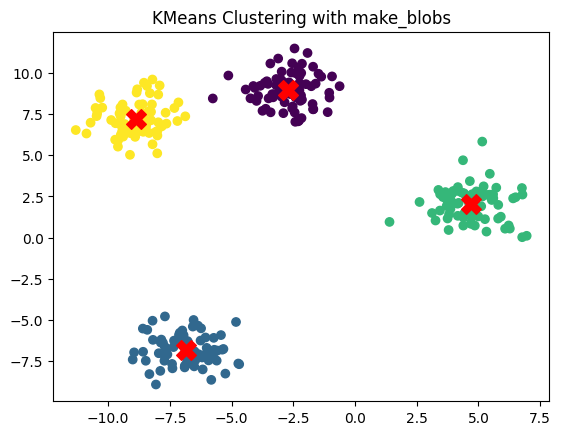

In [1]:
#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
#Answer:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X')
plt.title("KMeans Clustering with make_blobs")
plt.show()

In [2]:
#Question 7: Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise).
#Answer:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)

Number of clusters found: 5


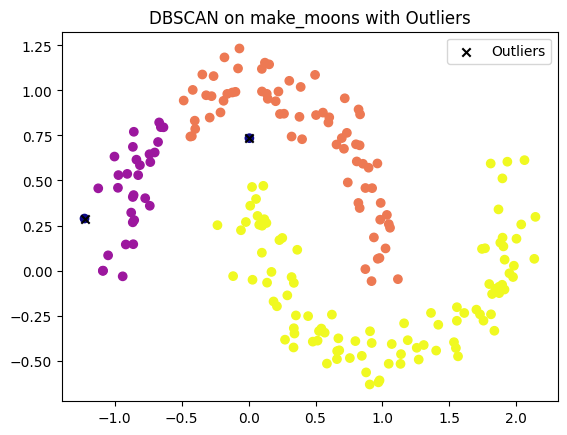

In [3]:
#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
#Answer:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.scatter(X[labels==-1,0], X[labels==-1,1], c='black', marker='x', label='Outliers')
plt.title("DBSCAN on make_moons with Outliers")
plt.legend()
plt.show()

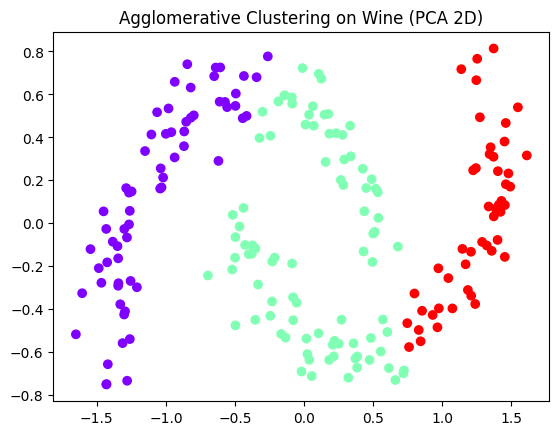

In [4]:
#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
#Answer:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering on Wine (PCA 2D)")
plt.show()






Sample dataset:
    Age  Income  Purchases
0   56   72733         36
1   46   85318         45
2   32  109474         20
3   60   43664          1
4   25   87172          8

Cluster labels assigned to first 10 customers:
    Age  Income  Purchases  Cluster
0   56   72733         36        2
1   46   85318         45        2
2   32  109474         20        1
3   60   43664          1        0
4   25   87172          8        1
5   38  105616         46        2
6   56  113264         16        4
7   36   46736         14        0
8   40  114209         12        4
9   28   20854         23        3


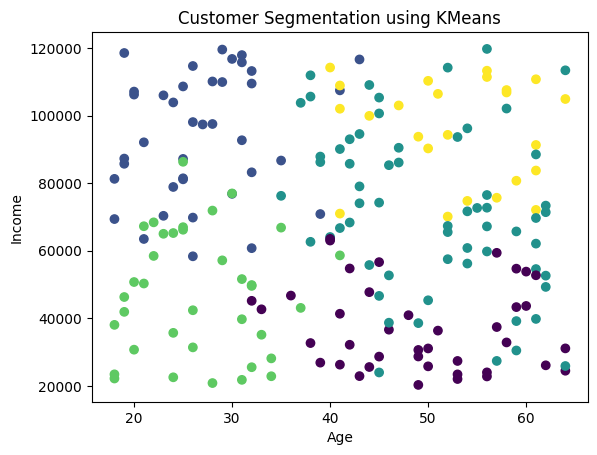


Cluster Centers (Age, Income, Purchases):
 [[4.92250000e+01 3.71682500e+04 1.58000000e+01]
 [2.70000000e+01 9.41503333e+04 1.80256410e+01]
 [5.03278689e+01 7.24584426e+04 3.99016393e+01]
 [2.66111111e+01 4.72057222e+04 3.04722222e+01]
 [5.26666667e+01 9.57102500e+04 1.10000000e+01]]


In [7]:
#Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions.
#Answer:
#- Algorithm(s): K-Means for large datasets, DBSCAN for noise handling, Hierarchical for small datasets.
#- Preprocessing: Handle missing values, scale features, encode categorical variables.
#- Number of clusters: Elbow Method, Silhouette Score, domain knowledge.
#- Marketing benefits: Identify high-value customers, personalize promotions, improve retention.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load or Create Dataset
# If you have a CSV file:
# customer_data = pd.read_csv("customers.csv")

# For demonstration, create synthetic dataset
np.random.seed(42)
customer_data = pd.DataFrame({
    'Age': np.random.randint(18, 65, 200),          # Customer age
    'Income': np.random.randint(20000, 120000, 200), # Annual income
    'Purchases': np.random.randint(1, 50, 200)       # Purchase frequency
})

print("Sample dataset:\n", customer_data.head())
# Step 2: Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data)
# Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
customer_data['Cluster'] = labels
print("\nCluster labels assigned to first 10 customers:\n", customer_data.head(10))

# Step 4: Visualize Clusters
plt.scatter(customer_data['Age'], customer_data['Income'], c=labels, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation using KMeans")
plt.show()

# Step 5: Analyze Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (Age, Income, Purchases):\n", cluster_centers)